In [ ]:
/home/titowoche30/Área de Trabalho/python suff/redes_neurais/kaggle_digits/data

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 

In [3]:
train = pd.read_csv('/content/drive/My Drive/kaggle_digits/data/train.csv')
test_kaggle = pd.read_csv('/content/drive/My Drive/kaggle_digits/data/test.csv')

In [44]:
train_3 = train[train['label'] == 3].drop('label',axis=1)
train_3_imgs = train_3.values.reshape(train_3.shape[0],28,28)

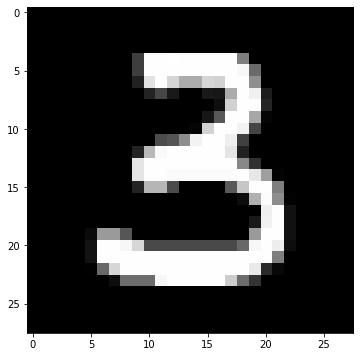

In [59]:
plt.figure(figsize=(6,6))
plt.imshow(train_3_imgs[np.random.randint(0,train_3.shape[0])],cmap='Greys_r')

In [4]:
train_labels = train['label']
train = train.drop('label',axis=1)

In [141]:
train.shape

(42000, 784)

In [5]:
train = train.values.reshape(42000,28,28,1)

In [6]:
train.shape

(42000, 28, 28, 1)

In [6]:
test_kaggle = test_kaggle.values.reshape(28000,28,28,1)

In [145]:
test_kaggle.shape

(28000, 28, 28, 1)

In [7]:
train = train.astype('float32')
test_kaggle = test_kaggle.astype('float32')

train /= 255
test_kaggle /= 255

In [8]:
X_train, X_test, y_train, y_test = train_test_split(train, train_labels, test_size=0.33, random_state=42) 

In [10]:
X_test.shape

(13860, 28, 28, 1)

In [188]:
shape = X_train.shape[1:]
                          
model = keras.Sequential([
                          keras.layers.Conv2D(input_shape=shape,filters=64, kernel_size=(3,3), activation='relu'),
                          keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
                          keras.layers.MaxPool2D(pool_size=(2,2),strides=2),
                          keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
                          keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
                          keras.layers.MaxPool2D(pool_size=(2,2),strides=2),
                          keras.layers.Dropout(0.4),
                          keras.layers.Flatten(),
                          keras.layers.Dense(128,activation='relu'),
                          keras.layers.Dense(64,activation='relu'),
                          keras.layers.Dense(32,activation='relu'),
                          keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
880/880 [==============================] - 3s 4ms/step - loss: 0.3845 - accuracy: 0.8739
Epoch 2/50
880/880 [==============================] - 3s 3ms/step - loss: 0.1219 - accuracy: 0.9625
Epoch 3/50
880/880 [==============================] - 3s 4ms/step - loss: 0.0904 - accuracy: 0.9722
Epoch 4/50
880/880 [==============================] - 3s 4ms/step - loss: 0.0778 - accuracy: 0.9758
Epoch 5/50
880/880 [==============================] - 3s 4ms/step - loss: 0.0671 - accuracy: 0.9793
Epoch 6/50
880/880 [==============================] - 3s 3ms/step - loss: 0.0614 - accuracy: 0.9804
Epoch 7/50
880/880 [==============================] - 3s 3ms/step - loss: 0.0563 - accuracy: 0.9830
Epoch 8/50
880/880 [==============================] - 3s 3ms/step - loss: 0.0493 - accuracy: 0.9847
Epoch 9/50
880/880 [==============================] - 3s 4ms/step - loss: 0.0472 - accuracy: 0.9858
Epoch 10/50
880/880 [==============================] - 3s 4ms/step - loss: 0.0413 - accuracy: 0.9877

In [189]:
model.evaluate(X_test,y_test)

434/434 [==============================] - 1s 2ms/step - loss: 0.0347 - accuracy: 0.9923


[0.03472669795155525, 0.9922799468040466]

In [182]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 24, 24, 32)        18464     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 8, 8, 16)          4624      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 4, 4, 16)        

In [9]:
pip install -U keras-tuner

     |████████████████████████████████| 61kB 3.1MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=6b756b549a55dacbde785f0b317c4f183b0978243a7d4f58ff2bf77e26bbe5d1
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=82f4c96d60ba2e6e62a32ad03c2817d0998732949eb928a74040df78591ed316
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [10]:
from kerastuner.tuners import RandomSearch

In [11]:
def build_model(hp):
    model = keras.Sequential()

    for i in range(hp.Int('Conv. Layers',min_value=1,max_value=3)):
        model.add(keras.layers.Conv2D(filters=hp.Choice(f'Conv_layer_{i}',[16,32,64,80]), kernel_size=hp.Choice('kernel',[2,3]), activation='relu'))
        
    model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

    for i in range(hp.Int('Conv. Layers',min_value=1,max_value=3)):
        model.add(keras.layers.Conv2D(filters=hp.Choice(f'Conv_layer_{i}',[16,32,64,80]), kernel_size=hp.Choice('kernel',[2,3]), activation='relu'))

    model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

    model.add(keras.layers.Dropout(rate=hp.Choice('Dropout',[0.1,0.2,0.3,0.4,0.5])))

    model.add(keras.layers.Flatten())

    model.add(keras.layers.Dense(hp.Choice('Dense Layer 1',[64,128,256,512]),activation='relu'))
    model.add(keras.layers.Dense(hp.Choice('Dense Layer 2',[32,64,128,256]),activation='relu'))
    model.add(keras.layers.Dense(hp.Choice('Dense Layer 3',[16,32,64,128]),activation='relu'))

    model.add(keras.layers.Dense(10,activation='softmax'))

    model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
    
    return model

In [12]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=100,
    executions_per_trial=1,
    directory='/content/drive/My Drive/kaggle_digits/data/novo_modelo_CNN_2',
    project_name='CNN_parametros_2')

INFO:tensorflow:Reloading Oracle from existing project /content/drive/My Drive/kaggle_digits/data/novo_modelo_CNN_2/CNN_parametros_2/oracle.json
INFO:tensorflow:Reloading Tuner from /content/drive/My Drive/kaggle_digits/data/novo_modelo_CNN_2/CNN_parametros_2/tuner0.json


In [13]:
tuner.search_space_summary()

In [1]:
tuner.search(X_train,y_train,validation_data=(X_test,y_test),epochs=30,batch_size=32)


In [14]:
best_model = tuner.get_best_models()[0]
best_model.evaluate(X_test,y_test)

434/434 [==============================] - 1s 3ms/step - loss: 0.0295 - accuracy: 0.9937


[0.02951633743941784, 0.9937229156494141]

In [15]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        18464     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 64)          0

In [19]:
y_test_predicted = np.argmax(best_model.predict(X_test),axis=1)

Text(0.5, 115.09999999999997, 'Predicted')

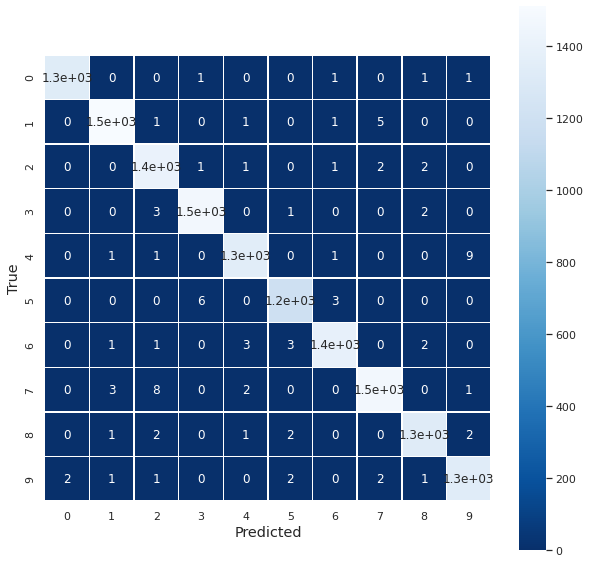

In [58]:
conf_matrix = confusion_matrix(y_test,y_test_predicted)

plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix,annot=True,cmap='Blues_r',linewidths=.5,square=True)
plt.ylabel('True',size='large')
plt.xlabel('Predicted',size='large')

In [59]:
model = best_model
test_kaggle_predicted = np.argmax(model.predict(test_kaggle),axis=1)

In [60]:
df_sub = pd.DataFrame({'ImageId':range(1,test_kaggle_predicted.shape[0]+1),'Label':test_kaggle_predicted})
df_sub.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [17]:
df_sub.to_csv('/content/drive/My Drive/kaggle_digits/data/sub_5.csv',index=False)

In [ ]:
#Score no test do kaggle: 0.99267